In [16]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import os

In [17]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [18]:
def mediapipe_detection(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img) #model predicts on input frame
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img,results

In [41]:
def draw_landmarks(img,results):
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)    
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    

In [114]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read() #read
        if not ret:
            break
        frame = cv2.flip(frame, 1)
        image, results = mediapipe_detection(frame,holistic) #apply model
        draw_landmarks(image, results) #draw results
        cv2.imshow('OpenCV Feed', image)#show
        if cv2.waitKey(10) & 0xFF == ord('q'):#quit
            break
    cap.release()
    cv2.destroyAllWindows()

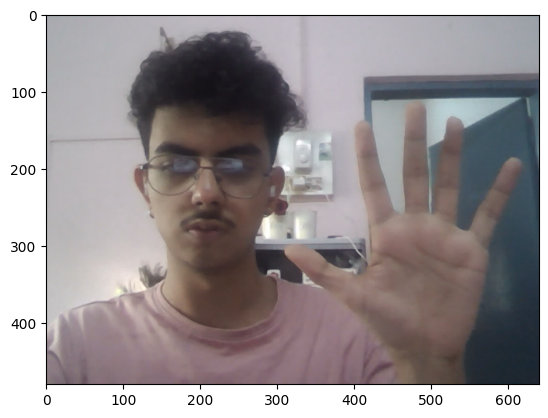

In [115]:
my_img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(my_img)

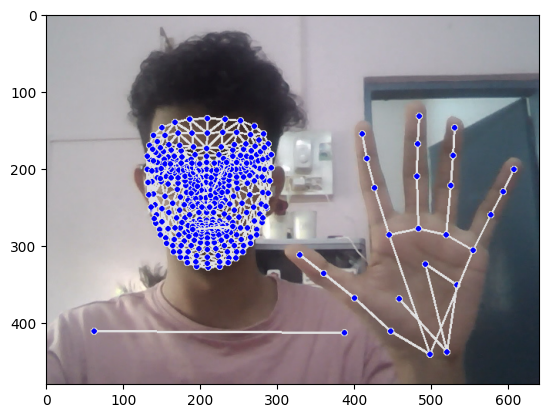

In [116]:
draw_landmarks(my_img, results)
plt.imshow(my_img)

In [128]:
def extract_data(results):
    pose_data = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face_data = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand_data = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand_data = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_data,face_data,left_hand_data,right_hand_data])

(1662,)